In [ ]:
# ワードクラウドを作成する環境を準備
!pip install mecab-python3
!pip install unidic
!python -m unidic download
!pip install japanize-matplotlib
!apt -y install fonts-ipafont-gothic
!wget https://raw.githubusercontent.com/KHiraGit/khira_nl_lab/main/wagahaiwa_nekodearu.txt

In [ ]:
# 必要なライブラリをインポート
import os
import re
import MeCab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import japanize_matplotlib

吾輩は猫である。名前はまだない。
吾輩 は 猫 で ある 。 名前 は まだ ない 。 



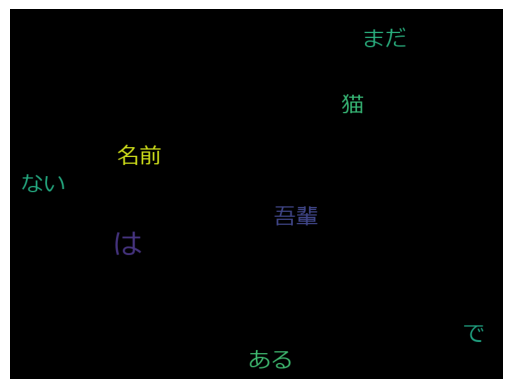

In [8]:
# 「吾輩は猫である」の冒頭からワードクラウドを作成
wakati = MeCab.Tagger('-Owakati')
text = '吾輩は猫である。名前はまだない。'
print(text)
wakati_text = wakati.parse(text)
print(wakati_text)

_width = 800
_height = 600
_stopwords = []
_max_words = 200
_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf' # google colab の場合
# _font_path = r"C:\WINDOWS\FONTS\MEIRYO.TTC" # Windows の場合
_max_font_size = 48
word_cloud = WordCloud(width=_width, height=_height, stopwords=_stopwords, max_words=_max_words, max_font_size=_max_font_size, font_path=_font_path).generate(wakati_text)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

入力テキストの行数 2376
前処理後テキストの文字数 31661


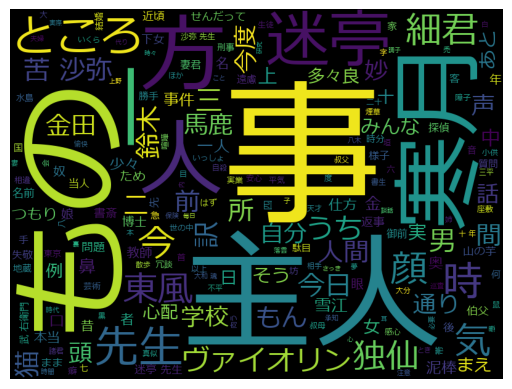

In [27]:
# 青空文庫からダウンロードした「吾輩は猫である」のワードクラウドを作成
with open(os.path.join('wagahaiwa_nekodearu.txt'), mode='r', encoding='sjis') as f:
    _text_list = f.readlines()
print('入力テキストの行数', len(_text_list))
_title = _text_list[0]
_author = _text_list[1]

_tagger = MeCab.Tagger()
_flag = 0
_words = ''
for _text in _text_list:
    if re.search(r'^---------------------------', _text):
        _flag = _flag + 1
    elif _flag > 1:
        _text = re.sub(r'［.+］', '', _text) # 入力者注 を削除
        _text = re.sub(r'｜', '', _text) # ルビの付く文字列の始まりを特定する記号 を除去
        _text = re.sub(r'《.+》', '', _text) # ルビ を除去
        _text = re.sub(r'〔.+〕', '', _text) # アクセント分解された欧文 を除去
        _text = _text.replace('\u3000', '') # 行頭のの全角スペース を除去
        _words = _words + _text

_tagger.parse('') # MeCab のエラー除け
node = _tagger.parseToNode(_words)
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type == '名詞':
        word_list.append(node.surface)
    node = node.next
word_chain = ' '.join(word_list)

print('前処理後テキストの文字数', len(word_chain))
_width = 800
_height = 600
_stopwords = []
_max_words = 200
_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf' # google colab の場合
# _font_path = r"C:\WINDOWS\FONTS\MEIRYO.TTC" # Windows の場合
_max_font_size = 256
word_cloud = WordCloud(width=_width, height=_height, stopwords=_stopwords, max_words=_max_words, max_font_size=_max_font_size, font_path=_font_path).generate(word_chain)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()